In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

import requests

from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | gigmoto
Processing Record 3 of Set 1 | yangambi
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | liverpool
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | mackay
Processing Record 13 of Set 1 | flinders
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tual
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | polovinnoye
Processing Rec

Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | valleyview
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | mopti
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | ponta delgada
Processing Record 44 of Set 4 | rocha
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | kulhudhuffushi
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | teguldet
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | nioro
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | san luis
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | panacan
Processing Record 9 of Set

Processing Record 32 of Set 8 | cozumel
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | quesnel
Processing Record 37 of Set 8 | aripuana
Processing Record 38 of Set 8 | iquitos
Processing Record 39 of Set 8 | blonduos
City not found. Skipping...
Processing Record 40 of Set 8 | maumere
Processing Record 41 of Set 8 | tommot
Processing Record 42 of Set 8 | serenje
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | irbeyskoye
Processing Record 45 of Set 8 | azul
Processing Record 46 of Set 8 | solnechnyy
Processing Record 47 of Set 8 | bara
Processing Record 48 of Set 8 | shubarkuduk
Processing Record 49 of Set 8 | juneau
Processing Record 50 of Set 8 | ibra
Processing Record 1 of Set 9 | oussouye
Processing Record 2 of Set 9 | hobyo
Processing Record 3 of Set 9 | alyangula
Processing Record 4 of Set 9 | maracacume
Processin

Processing Record 19 of Set 12 | alotau
City not found. Skipping...
Processing Record 20 of Set 12 | bereda
Processing Record 21 of Set 12 | egvekinot
Processing Record 22 of Set 12 | borogontsy
Processing Record 23 of Set 12 | raudeberg
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | praya
Processing Record 26 of Set 12 | kathmandu
Processing Record 27 of Set 12 | yeppoon
Processing Record 28 of Set 12 | inuvik
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | san carlos
Processing Record 31 of Set 12 | kirakira
Processing Record 32 of Set 12 | marzuq
Processing Record 33 of Set 12 | coihaique
Processing Record 34 of Set 12 | oriximina
Processing Record 35 of Set 12 | mamallapuram
Processing Record 36 of Set 12 | joshimath
Processing Record 37 of Set 12 | saint-joseph
Processing Record 38 of Set 12 | bolitoc
Processing Record 39 of Set 12 | nerchinskiy zavod
Processing Record 40 of Set 12 | tevaitoa
Processing Record 41 of Set

In [35]:
len(city_data)

568

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.20,61,75,11.50,CL,2021-02-05 04:02:09
1,Gigmoto,13.7796,124.3900,78.67,85,94,13.91,PH,2021-02-05 04:02:39
2,Yangambi,0.8102,24.4336,70.57,98,98,2.04,CD,2021-02-05 04:02:40
3,Souillac,-20.5167,57.5167,82.40,65,40,11.50,MU,2021-02-05 04:01:16
4,Chokurdakh,70.6333,147.9167,-15.32,86,98,20.56,RU,2021-02-05 04:02:40
5,Liverpool,53.4106,-2.9779,44.60,93,75,3.44,GB,2021-02-05 04:01:40
6,Cabo San Lucas,22.8909,-109.9124,73.99,46,20,6.91,MX,2021-02-05 04:02:38
7,Sao Felix Do Xingu,-6.6447,-51.9950,74.73,87,99,1.21,BR,2021-02-05 04:02:40
8,New Norfolk,-42.7826,147.0587,78.01,78,100,1.01,AU,2021-02-05 04:02:40
9,Kodiak,57.7900,-152.4072,24.80,80,1,8.05,US,2021-02-05 04:02:40


In [37]:
# Reordering the columns of the dataframe
new_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_order]

In [38]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-02-05 04:02:09,-53.1500,-70.9167,48.20,61,75,11.50
1,Gigmoto,PH,2021-02-05 04:02:39,13.7796,124.3900,78.67,85,94,13.91
2,Yangambi,CD,2021-02-05 04:02:40,0.8102,24.4336,70.57,98,98,2.04
3,Souillac,MU,2021-02-05 04:01:16,-20.5167,57.5167,82.40,65,40,11.50
4,Chokurdakh,RU,2021-02-05 04:02:40,70.6333,147.9167,-15.32,86,98,20.56


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

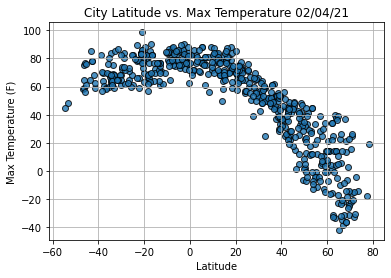

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

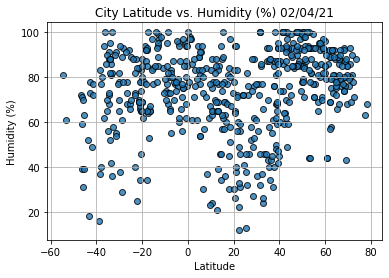

In [48]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

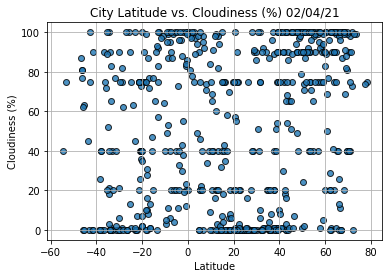

In [49]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

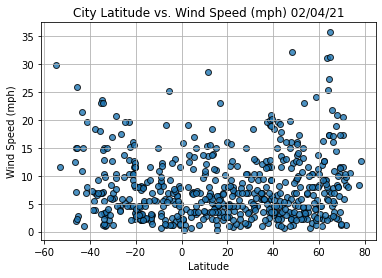

In [50]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

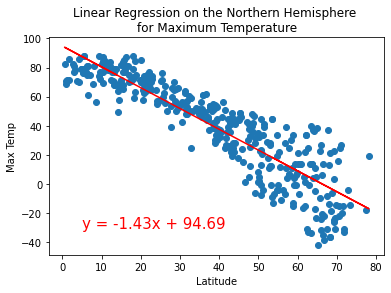

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(5,-30))

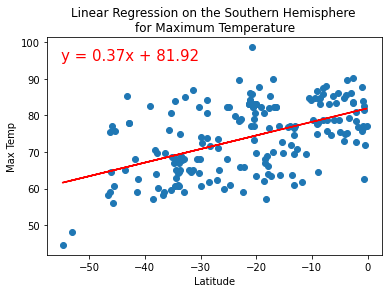

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-55,95))

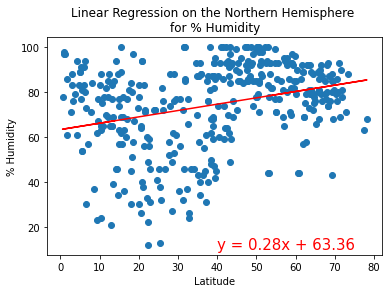

In [63]:
# Linear regression on the Northern Hemisphere for Humidity vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

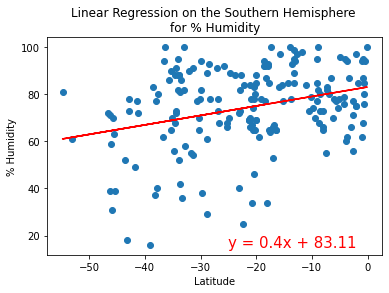

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-25,15))

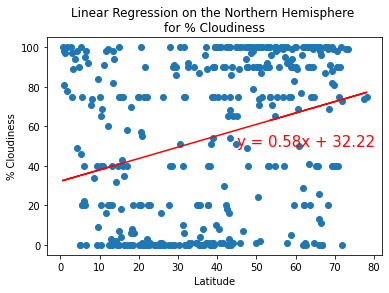

In [68]:
# Linear regression on the Northern Hemisphere for Cloudiness vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(45,50))

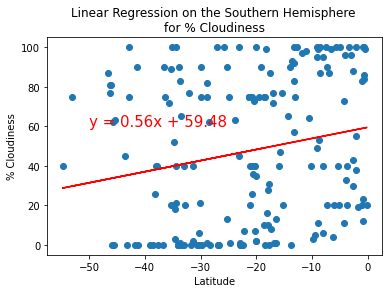

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

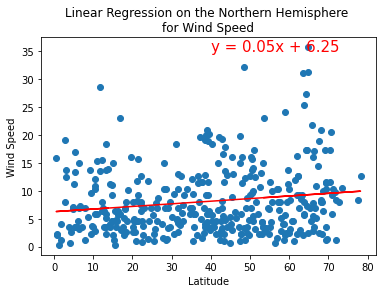

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

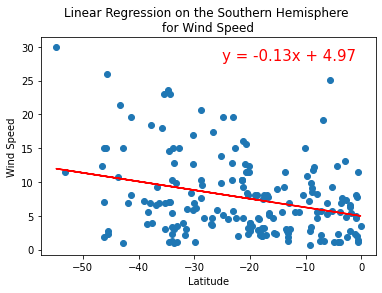

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-25,28))